In [218]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

class Analysis():
    def connect_db(self):
        connection = sqlite3.connect('./data/ClimateData_revised.sqlite')
        query = "SELECT * FROM ClimateData_revised"  
        df = pd.read_sql_query(query, connection)
        connection.close()

        df = pd.DataFrame(df)
        df['Disaster Type'] = df['Disaster Type'].astype(str).str.strip()
        df = df.rename(columns={'Disaster Type': 'Disaster_Type'})
        # Remove specified columns
        columns_to_remove = [
            'Population(2022)', 
            'Area', 
            '% of World', 
            'Density(km2)',
            'Source', 
            'CTS_Code', 
            'CTS_Name'
        ]
        df.drop(columns=columns_to_remove, inplace=True)
        




        # Print the updated DataFrame
        print(df.head(30).to_markdown(index=False, numalign="left", stralign="left"))
        return df

    
    
    def top_5_CO2_emitting_countries(self, df):
        # For each year take top 5 countries with highest CO2 emissions
        df['rank'] = df.groupby('Year')['CO2_Emission'].rank(method='dense', ascending=False)
        top_countries_per_year = df[df['rank'] <= 5]
        return top_countries_per_year
    
    def CO2_historical(self, df):
        # Get the overall top 5 CO2-emitting countries
        top_countries = df.groupby('Country')['CO2_Emission'].sum().sort_values(ascending=False).head(5).index

        # Filter the data for the top 5 countries
        historical_CO2 = df[df['Country'].isin(top_countries)]

        # Plot the data
        plt.figure(figsize=(6, 6))
        for country in historical_CO2['Country'].unique():
            country_df = historical_CO2[historical_CO2['Country'] == country]
            plt.plot(country_df['Year'], country_df['CO2_Emission'], label=country)
        plt.xlabel('Year')
        plt.ylabel('CO2 Emission')
        plt.title('Top 5 CO2-Emitting Countries Year-Wise')
        plt.legend()
        plt.show()

    def filter_by_disaster_type(self, df, disaster_type):
        filtered_df = df[df['Disaster_Type'] == disaster_type]
        return filtered_df

    def flood(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Flood')

    def wildfire(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Wildfire')

    def extreme_temp(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Extreme temperature')

    def landslide(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Landslide')

    def storm(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Storm')

    def drought(self, top_countries_per_year):
        return self.filter_by_disaster_type(top_countries_per_year, 'Drought')

if __name__ == '__main__':
    analysis = Analysis()
    df = analysis.connect_db()
    
    top_countries_per_year = analysis.top_5_CO2_emitting_countries(df)
    flood_info = analysis.flood(top_countries_per_year)
    wildfire_info = analysis.wildfire(top_countries_per_year)
    extreme_temperature_info = analysis.extreme_temp(top_countries_per_year)
    landslide_info = analysis.landslide(top_countries_per_year)
    storm_info = analysis.storm(top_countries_per_year)
    drought_info = analysis.drought(top_countries_per_year)
    
    
    
    

| Country             | Code   | Year   | CO2_Emission   | Disaster_Type       | F1980   | F1981   | F1982   | F1983   | F1984   | F1985   | F1986   | F1987   | F1988   | F1989   | F1990   | F1991   | F1992   | F1993   | F1994   | F1995   | F1996   | F1997   | F1998   | F1999   | F2000   | F2001   | F2002   | F2003   | F2004   | F2005   | F2006   | F2007   | F2008   | F2009   | F2010   | F2011   | F2012   | F2013   | F2014   | F2015   | F2016   | F2017   | F2018   | F2019   | F2020   |
|:--------------------|:-------|:-------|:---------------|:--------------------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|
| Zimbabwe        

Writing SQL Queries for extraction and analysis


Top Countries with highest CO2 emissions

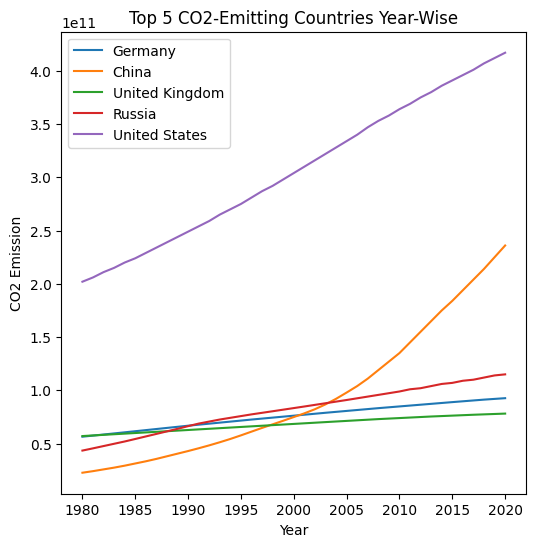

In [219]:
historical_CO2 = analysis.CO2_historical(df)

Stats for flood

In [220]:
#UK-43
flood_info

# 1980s
# filter the dataframe to only include rows where Year is between 1980 and 1990
df_80_90 = flood_info[(flood_info['Year'] >= 1980) & (flood_info['Year'] < 1990)]

# calculate the average CO2_Emission
avg_co2_1 = df_80_90['CO2_Emission'].mean()

# calculate the sum of F1980 to F1990
sum_f80_90 = np.sum(df_80_90.iloc[:, 5:15].values)  # assuming F1980 to F1990 are columns 5 to 14

print(f"Average CO2 Emission (1980-1990): {avg_co2_1:.2f}")
print(f"Sum of F1980 to F1990: {sum_f80_90:.2f}")

# 1990s
# filter the dataframe to only include rows where Year is between 1990 and 2000
df_90_2000 = flood_info[(flood_info['Year'] >= 1990) & (flood_info['Year'] < 2000)]

# calculate the average CO2_Emission
avg_co2_2 = df_90_2000['CO2_Emission'].mean()

# calculate the sum of F1990 to F2000
sum_f90_2000 = np.sum(df_90_2000.iloc[:, 15:25].values)
print(f"Average CO2 Emission (1990-2000): {avg_co2_2:.2f}")
print(f"Sum of F1990 to F2000: {sum_f90_2000:.2f}")

# 2000s
# filter the dataframe to only include rows where Year is between 2000 and 2010
df_2000_2010 = flood_info[(flood_info['Year'] >= 2000) & (flood_info['Year'] < 2010)]

# calculate the average CO2_Emission
avg_co2_3 = df_2000_2010['CO2_Emission'].mean()

# calculate the sum of F2000 to F2010
sum_f2000_2010 = np.sum(df_2000_2010.iloc[:, 25:35].values)
print(f"Average CO2 Emission (2000-2010): {avg_co2_3:.2f}")
print(f"Sum of F2000 to F2010: {sum_f2000_2010:.2f}")

# 2010s
# filter the dataframe to only include rows where Year is between 2010 and 2020
df_2010_2020 = flood_info[(flood_info['Year'] >= 2010) & (flood_info['Year'] <= 2020)]

# calculate the average CO2_Emission
avg_co2_4 = df_2010_2020['CO2_Emission'].mean()

# calculate the sum of F2010 to F2020
sum_f2010_2020 = np.sum(df_2010_2020.iloc[:, 35:45].values) 
print(f"Average CO2 Emission (2010-2020): {avg_co2_4:.2f}")
print(f"Sum of F2010 to F2020: {sum_f2010_2020:.2f}")
# create a dictionary to store the results
results = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1, avg_co2_2, avg_co2_3, avg_co2_4],
    'Sum of Flood': [sum_f80_90, sum_f90_2000, sum_f2000_2010, sum_f2010_2020]
}

# create a dataframe from the dictionary
df_results_flood = pd.DataFrame(results)
df_results_flood



Average CO2 Emission (1980-1990): 85464291405.88
Sum of F1980 to F1990: 569.00
Average CO2 Emission (1990-2000): 108148651767.14
Sum of F1990 to F2000: 1260.00
Average CO2 Emission (2000-2010): 134001640800.74
Sum of F2000 to F2010: 2040.00
Average CO2 Emission (2010-2020): 169543585918.95
Sum of F2010 to F2020: 1914.00


,Decade,Average CO2 Emission,Sum of Flood
0,1980-1990,8.546429e+10,569.0
1,1990-2000,1.081487e+11,1260.0
2,2000-2010,1.340016e+11,2040.0
3,2010-2020,1.695436e+11,1914.0


In [221]:
# Wildfire
# 1980s
df_80_90_wildfire = wildfire_info[(wildfire_info['Year'] >= 1980) & (wildfire_info['Year'] < 1990)]
avg_co2_1_wildfire = df_80_90_wildfire['CO2_Emission'].mean()
sum_f80_90_wildfire = df_80_90_wildfire.iloc[:, 5:15].sum().sum()
print(f"Average CO2 Emission (1980-1990) - Wildfire: {avg_co2_1_wildfire:.2f}")
print(f"Sum of F1980 to F1990 - Wildfire: {sum_f80_90_wildfire:.2f}")

# 1990s
df_90_2000_wildfire = wildfire_info[(wildfire_info['Year'] >= 1990) & (wildfire_info['Year'] < 2000)]
avg_co2_2_wildfire = df_90_2000_wildfire['CO2_Emission'].mean()
sum_f90_2000_wildfire = df_90_2000_wildfire.iloc[:, 15:25].sum().sum()
print(f"Average CO2 Emission (1990-2000) - Wildfire: {avg_co2_2_wildfire:.2f}")
print(f"Sum of F1990 to F2000 - Wildfire: {sum_f90_2000_wildfire:.2f}")

# 2000s
df_2000_2010_wildfire = wildfire_info[(wildfire_info['Year'] >= 2000) & (wildfire_info['Year'] < 2010)]
avg_co2_3_wildfire = df_2000_2010_wildfire['CO2_Emission'].mean()
sum_f2000_2010_wildfire = df_2000_2010_wildfire.iloc[:, 25:35].sum().sum()
print(f"Average CO2 Emission (2000-2010) - Wildfire: {avg_co2_3_wildfire:.2f}")
print(f"Sum of F2000 to F2010 - Wildfire: {sum_f2000_2010_wildfire:.2f}")

# 2010s
df_2010_2020_wildfire = wildfire_info[(wildfire_info['Year'] >= 2010) & (wildfire_info['Year'] <= 2020)]
avg_co2_4_wildfire = df_2010_2020_wildfire['CO2_Emission'].mean()
sum_f2010_2020_wildfire = df_2010_2020_wildfire.iloc[:, 35:45].sum().sum()
print(f"Average CO2 Emission (2010-2020) - Wildfire: {avg_co2_4_wildfire:.2f}")
print(f"Sum of F2010 to F2020 - Wildfire: {sum_f2010_2020_wildfire:.2f}")

# create a dictionary to store the results
results_wildfire = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1_wildfire, avg_co2_2_wildfire, avg_co2_3_wildfire, avg_co2_4_wildfire],
    'Sum of Wildfire': [sum_f80_90_wildfire, sum_f90_2000_wildfire, sum_f2000_2010_wildfire, sum_f2010_2020_wildfire]
}

# create a dataframe from the dictionary
df_results_wildfire = pd.DataFrame(results_wildfire)
df_results_wildfire

Average CO2 Emission (1980-1990) - Wildfire: 102216706736.37
Sum of F1980 to F1990 - Wildfire: 24.00
Average CO2 Emission (1990-2000) - Wildfire: 134764688929.23
Sum of F1990 to F2000 - Wildfire: 250.00
Average CO2 Emission (2000-2010) - Wildfire: 172924594259.70
Sum of F2000 to F2010 - Wildfire: 480.00
Average CO2 Emission (2010-2020) - Wildfire: 227543043705.36
Sum of F2010 to F2020 - Wildfire: 374.00


,Decade,Average CO2 Emission,Sum of Wildfire
0,1980-1990,1.022167e+11,24.0
1,1990-2000,1.347647e+11,250.0
2,2000-2010,1.729246e+11,480.0
3,2010-2020,2.275430e+11,374.0


In [222]:
# Extreme Temperature
# 1980s
df_80_90_extreme_temp = extreme_temperature_info[(extreme_temperature_info['Year'] >= 1980) & (extreme_temperature_info['Year'] < 1990)]
avg_co2_1_extreme_temp = df_80_90_extreme_temp['CO2_Emission'].mean()
sum_f80_90_extreme_temp = df_80_90_extreme_temp.iloc[:, 5:15].sum().sum()
print(f"Average CO2 Emission (1980-1990) - Extreme Temperature: {avg_co2_1_extreme_temp:.2f}")
print(f"Sum of F1980 to F1990 - Extreme Temperature: {sum_f80_90_extreme_temp:.2f}")

# 1990s
df_90_2000_extreme_temp = extreme_temperature_info[(extreme_temperature_info['Year'] >= 1990)]
avg_co2_2_extreme_temp = df_90_2000_extreme_temp['CO2_Emission'].mean()
sum_f90_2000_extreme_temp = df_90_2000_extreme_temp.iloc[:, 15:25].sum().sum()
print(f"Average CO2 Emission (1990-2000) - Extreme Temperature: {avg_co2_2_extreme_temp:.2f}")
print(f"Sum of F1990 to F2000 - Extreme Temperature: {sum_f90_2000_extreme_temp:.2f}")

# 2000s
df_2000_2010_extreme_temp = extreme_temperature_info[(extreme_temperature_info['Year'] >= 2000) & (extreme_temperature_info['Year'] < 2010)]
avg_co2_3_extreme_temp = df_2000_2010_extreme_temp['CO2_Emission'].mean()
sum_f2000_2010_extreme_temp = df_2000_2010_extreme_temp.iloc[:, 25:35].sum().sum()
print(f"Average CO2 Emission (2000-2010) - Extreme Temperature: {avg_co2_3_extreme_temp:.2f}")
print(f"Sum of F2000 to F2010 - Extreme Temperature: {sum_f2000_2010_extreme_temp:.2f}")

# 2010s
df_2010_2020_extreme_temp = extreme_temperature_info[(extreme_temperature_info['Year'] >= 2010) & (extreme_temperature_info['Year'] <= 2020)]
avg_co2_4_extreme_temp = df_2010_2020_extreme_temp['CO2_Emission'].mean()
sum_f2010_2020_extreme_temp = df_2010_2020_extreme_temp.iloc[:, 35:45].sum().sum()
print(f"Average CO2 Emission (2010-2020) - Extreme Temperature: {avg_co2_4_extreme_temp:.2f}")
print(f"Sum of F2010 to F2020 - Extreme Temperature: {sum_f2010_2020_extreme_temp:.2f}")

# create a dictionary to store the results
results_extreme_temp = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1_extreme_temp, avg_co2_2_extreme_temp, avg_co2_3_extreme_temp, avg_co2_4_extreme_temp],
    'Sum of Extreme Temperature': [sum_f80_90_extreme_temp, sum_f90_2000_extreme_temp, sum_f2000_2010_extreme_temp, sum_f2010_2020_extreme_temp]
}

# create a dataframe from the dictionary
df_results_extreme_temp = pd.DataFrame(results_extreme_temp)
df_results_extreme_temp

Average CO2 Emission (1980-1990) - Extreme Temperature: 85464291405.88
Sum of F1980 to F1990 - Extreme Temperature: 60.00
Average CO2 Emission (1990-2000) - Extreme Temperature: 138273624864.10
Sum of F1990 to F2000 - Extreme Temperature: 682.00
Average CO2 Emission (2000-2010) - Extreme Temperature: 134001640800.74
Sum of F2000 to F2010 - Extreme Temperature: 320.00
Average CO2 Emission (2010-2020) - Extreme Temperature: 169543585918.95
Sum of F2010 to F2020 - Extreme Temperature: 264.00


,Decade,Average CO2 Emission,Sum of Extreme Temperature
0,1980-1990,8.546429e+10,60.0
1,1990-2000,1.382736e+11,682.0
2,2000-2010,1.340016e+11,320.0
3,2010-2020,1.695436e+11,264.0


In [223]:
# Landslide
# 1980s
df_80_90_landslide = landslide_info[(landslide_info['Year'] >= 1980) & (landslide_info['Year'] < 1990)]
avg_co2_1_landslide = df_80_90_landslide['CO2_Emission'].mean()
sum_f80_90_landslide = df_80_90_landslide.iloc[:, 5:15].sum().sum()
print(f"Average CO2 Emission (1980-1990) - Landslide: {avg_co2_1_landslide:.2f}")
print(f"Sum of F1980 to F1990 - Landslide: {sum_f80_90_landslide:.2f}")

# 1990s
df_90_2000_landslide = landslide_info[(landslide_info['Year'] >= 1990) & (landslide_info['Year'] < 2000)]
avg_co2_2_landslide = df_90_2000_landslide['CO2_Emission'].mean()
sum_f90_2000_landslide = df_90_2000_landslide.iloc[:, 15:25].sum().sum()
print(f"Average CO2 Emission (1990-2000) - Landslide: {avg_co2_2_landslide:.2f}")
print(f"Sum of F1990 to F2000 - Landslide: {sum_f90_2000_landslide:.2f}")

# 2000s
df_2000_2010_landslide = landslide_info[(landslide_info['Year'] >= 2000) & (landslide_info['Year'] < 2010)]
avg_co2_3_landslide = df_2000_2010_landslide['CO2_Emission'].mean()
sum_f2000_2010_landslide = df_2000_2010_landslide.iloc[:, 25:35].sum().sum()
print(f"Average CO2 Emission (2000-2010) - Landslide: {avg_co2_3_landslide:.2f}")
print(f"Sum of F2000 to F2010 - Landslide: {sum_f2000_2010_landslide:.2f}")

# 2010s
df_2010_2020_landslide = landslide_info[(landslide_info['Year'] >= 2010) & (landslide_info['Year'] <= 2020)]
avg_co2_4_landslide = df_2010_2020_landslide['CO2_Emission'].mean()
sum_f2010_2020_landslide = df_2010_2020_landslide.iloc[:, 35:45].sum().sum()
print(f"Average CO2 Emission (2010-2020) - Landslide: {avg_co2_4_landslide:.2f}")
print(f"Sum of F2010 to F2020 - Landslide: {sum_f2010_2020_landslide:.2f}")

# create a dictionary to store the results
results_landslide = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1_landslide, avg_co2_2_landslide, avg_co2_3_landslide, avg_co2_4_landslide],
    'Sum of Landslide': [sum_f80_90_landslide, sum_f90_2000_landslide, sum_f2000_2010_landslide, sum_f2010_2020_landslide]
}

# create a dataframe from the dictionary
df_results_landslide = pd.DataFrame(results_landslide)
df_results_landslide

Average CO2 Emission (1980-1990) - Landslide: 91940139346.60
Sum of F1980 to F1990 - Landslide: 76.00
Average CO2 Emission (1990-2000) - Landslide: 118852910608.73
Sum of F1990 to F2000 - Landslide: 190.00
Average CO2 Emission (2000-2010) - Landslide: 149747162709.25
Sum of F2000 to F2010 - Landslide: 310.00
Average CO2 Emission (2010-2020) - Landslide: 192878366172.11
Sum of F2010 to F2020 - Landslide: 308.00


,Decade,Average CO2 Emission,Sum of Landslide
0,1980-1990,9.194014e+10,76.0
1,1990-2000,1.188529e+11,190.0
2,2000-2010,1.497472e+11,310.0
3,2010-2020,1.928784e+11,308.0


In [224]:
# Storm
# 1980s
df_80_90_storm = storm_info[(storm_info['Year'] >= 1980) & (storm_info['Year'] < 1990)]
avg_co2_1_storm = df_80_90_storm['CO2_Emission'].mean()
sum_f80_90_storm = df_80_90_storm.iloc[:, 5:15].sum().sum()
print(f"Average CO2 Emission (1980-1990) - Storm: {avg_co2_1_storm:.2f}")
print(f"Sum of F1980 to F1990 - Storm: {sum_f80_90_storm:.2f}")

# 1990s
df_90_2000_storm = storm_info[(storm_info['Year'] >= 1990) & (storm_info['Year'] < 2000)]
avg_co2_2_storm = df_90_2000_storm['CO2_Emission'].mean()
sum_f90_2000_storm = df_90_2000_storm.iloc[:, 15:25].sum().sum()
print(f"Average CO2 Emission (1990-2000) - Storm: {avg_co2_2_storm:.2f}")
print(f"Sum of F1990 to F2000 - Storm: {sum_f90_2000_storm:.2f}")

# 2000s
df_2000_2010_storm = storm_info[(storm_info['Year'] >= 2000) & (storm_info['Year'] < 2010)]
avg_co2_3_storm = df_2000_2010_storm['CO2_Emission'].mean()
sum_f2000_2010_storm = df_2000_2010_storm.iloc[:, 25:35].sum().sum()
print(f"Average CO2 Emission (2000-2010) - Storm: {avg_co2_3_storm:.2f}")
print(f"Sum of F2000 to F2010 - Storm: {sum_f2000_2010_storm:.2f}")
# 2010s
df_2010_2020_storm = storm_info[(storm_info['Year'] >= 2010) & (storm_info['Year'] <= 2020)]
avg_co2_4_storm = df_2010_2020_storm['CO2_Emission'].mean()
sum_f2010_2020_storm = df_2010_2020_storm.iloc[:, 35:45].sum().sum()
print(f"Average CO2 Emission (2010-2020) - Storm: {avg_co2_4_storm:.2f}")
print(f"Sum of F2010 to F2020 - Storm: {sum_f2010_2020_storm:.2f}")

# create a dictionary to store the results
results_storm = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1_storm, avg_co2_2_storm, avg_co2_3_storm, avg_co2_4_storm],
    'Sum of Storm': [sum_f80_90_storm, sum_f90_2000_storm, sum_f2000_2010_storm, sum_f2010_2020_storm]
}

# create a dataframe from the dictionary
df_results_storm = pd.DataFrame(results_storm)
df_results_storm

Average CO2 Emission (1980-1990) - Storm: 85464291405.88
Sum of F1980 to F1990 - Storm: 1274.00
Average CO2 Emission (1990-2000) - Storm: 108148651767.14
Sum of F1990 to F2000 - Storm: 2780.00
Average CO2 Emission (2000-2010) - Storm: 134001640800.74
Sum of F2000 to F2010 - Storm: 2500.00
Average CO2 Emission (2010-2020) - Storm: 169543585918.95
Sum of F2010 to F2020 - Storm: 3025.00


,Decade,Average CO2 Emission,Sum of Storm
0,1980-1990,8.546429e+10,1274.0
1,1990-2000,1.081487e+11,2780.0
2,2000-2010,1.340016e+11,2500.0
3,2010-2020,1.695436e+11,3025.0


In [225]:
# Drought
# 1980s
df_80_90_drought = drought_info[(drought_info['Year'] >= 1980) & (drought_info['Year'] < 1990)]
avg_co2_1_drought = df_80_90_drought['CO2_Emission'].mean()
sum_f80_90_drought = df_80_90_drought.iloc[:, 5:15].sum().sum()
print(f"Average CO2 Emission (1980-1990) - Drought: {avg_co2_1_drought:.2f}")
print(f"Sum of F1980 to F1990 - Drought: {sum_f80_90_drought:.2f}")

# 1990s
df_90_2000_drought = drought_info[(drought_info['Year'] >= 1990) & (drought_info['Year'] < 2000)]
avg_co2_2_drought = df_90_2000_drought['CO2_Emission'].mean()
sum_f90_2000_drought = df_90_2000_drought.iloc[:, 15:25].sum().sum()
print(f"Average CO2 Emission (1990-2000) - Drought: {avg_co2_2_drought:.2f}")
print(f"Sum of F1990 to F2000 - Drought: {sum_f90_2000_drought:.2f}")

# 2000s
df_2000_2010_drought = drought_info[(drought_info['Year'] >= 2000) & (drought_info['Year'] < 2010)]
avg_co2_3_drought = df_2000_2010_drought['CO2_Emission'].mean()
sum_f2000_2010_drought = df_2000_2010_drought.iloc[:, 25:35].sum().sum()
print(f"Average CO2 Emission (2000-2010) - Drought: {avg_co2_3_drought:.2f}")
print(f"Sum of F2000 to F2010 - Drought: {sum_f2000_2010_drought:.2f}")

# 2010s
df_2010_2020_drought = drought_info[(drought_info['Year'] >= 2010) & (drought_info['Year'] <= 2020)]
avg_co2_4_drought = df_2010_2020_drought['CO2_Emission'].mean()
sum_f2010_2020_drought = df_2010_2020_drought.iloc[:, 35:45].sum().sum()
print(f"Average CO2 Emission (2010-2020) - Drought: {avg_co2_4_drought:.2f}")
print(f"Sum of F2010 to F2020 - Drought: {sum_f2010_2020_drought:.2f}")
# create a dictionary to store the results
results_drought = {
    'Decade': ['1980-1990', '1990-2000', '2000-2010', '2010-2020'],
    'Average CO2 Emission': [avg_co2_1_drought, avg_co2_2_drought, avg_co2_3_drought, avg_co2_4_drought],
    'Sum of Drought': [sum_f80_90_drought, sum_f90_2000_drought, sum_f2000_2010_drought, sum_f2010_2020_drought]
}

# create a dataframe from the dictionary
df_results_drought = pd.DataFrame(results_drought)
df_results_drought

Average CO2 Emission (1980-1990) - Drought: 91552754963.02
Sum of F1980 to F1990 - Drought: 39.00
Average CO2 Emission (1990-2000) - Drought: 117406420797.12
Sum of F1990 to F2000 - Drought: 130.00
Average CO2 Emission (2000-2010) - Drought: 147448333986.45
Sum of F2000 to F2010 - Drought: 210.00
Average CO2 Emission (2010-2020) - Drought: 189708399005.59
Sum of F2010 to F2020 - Drought: 176.00


,Decade,Average CO2 Emission,Sum of Drought
0,1980-1990,9.155275e+10,39.0
1,1990-2000,1.174064e+11,130.0
2,2000-2010,1.474483e+11,210.0
3,2010-2020,1.897084e+11,176.0


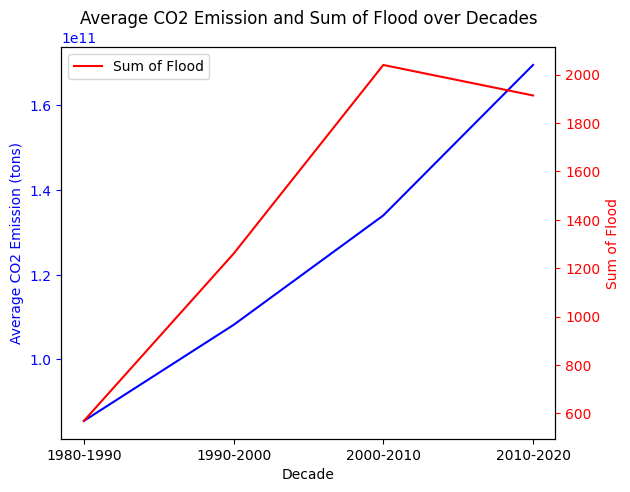

In [226]:
##Charts
df_results_flood


#



fig, ax1 = plt.subplots()

ax1.plot(df_results_flood['Decade'], df_results_flood['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_flood['Decade'], df_results_flood['Sum of Flood'], 'r-', label='Sum of Flood')
ax2.set_ylabel('Sum of Flood', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Flood over Decades')
plt.legend()
plt.show()

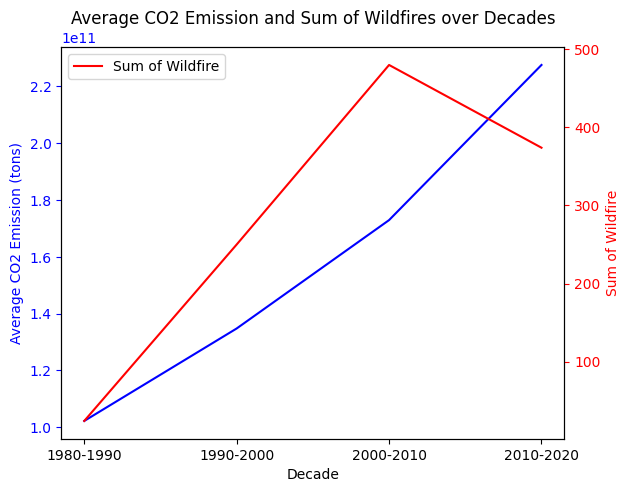

In [227]:
fig, ax1 = plt.subplots()

ax1.plot(df_results_wildfire['Decade'], df_results_wildfire['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_wildfire['Decade'], df_results_wildfire['Sum of Wildfire'], 'r-', label='Sum of Wildfire')
ax2.set_ylabel('Sum of Wildfire', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Wildfires over Decades')
plt.legend()
plt.show()

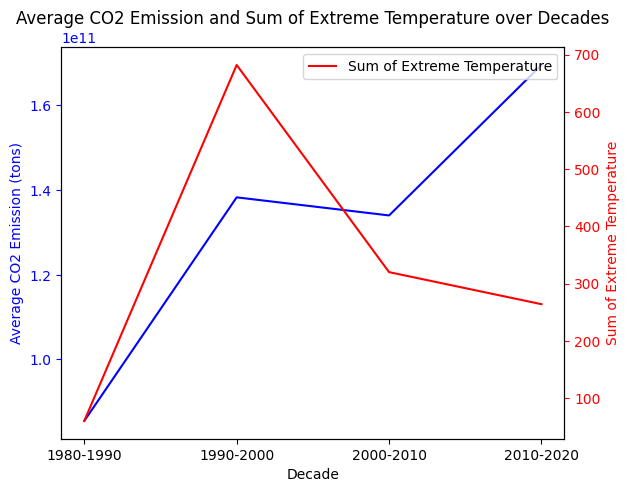

In [228]:
df_results_extreme_temp
 #df_results_landslide
# df_results_storm
# df_results_drought
fig, ax1 = plt.subplots()

ax1.plot(df_results_extreme_temp['Decade'], df_results_extreme_temp['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_extreme_temp['Decade'], df_results_extreme_temp['Sum of Extreme Temperature'], 'r-', label='Sum of Extreme Temperature')
ax2.set_ylabel('Sum of Extreme Temperature', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Extreme Temperature over Decades')
plt.legend()
plt.show()

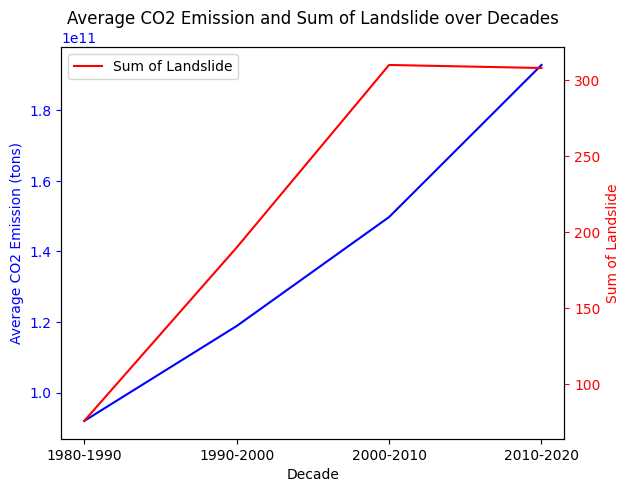

In [229]:
df_results_landslide
# df_results_storm
# df_results_drought
fig, ax1 = plt.subplots()

ax1.plot(df_results_landslide['Decade'], df_results_landslide['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_landslide['Decade'], df_results_landslide['Sum of Landslide'], 'r-', label='Sum of Landslide')
ax2.set_ylabel('Sum of Landslide', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Landslide over Decades')
plt.legend()
plt.show()

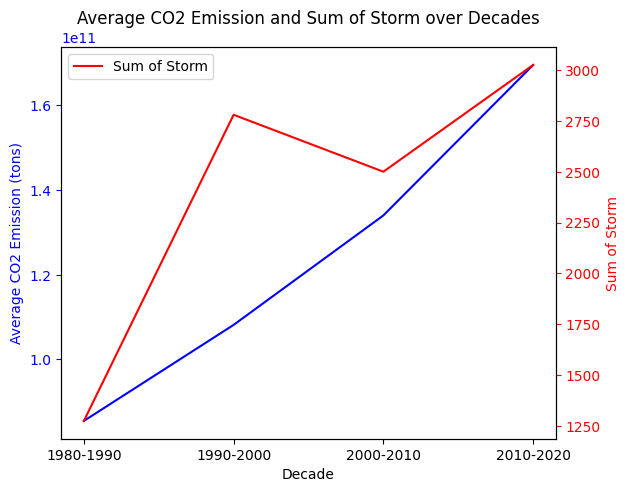

In [230]:
df_results_storm
# df_results_drought
fig, ax1 = plt.subplots()

ax1.plot(df_results_storm['Decade'], df_results_storm['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_storm['Decade'], df_results_storm['Sum of Storm'], 'r-', label='Sum of Storm')
ax2.set_ylabel('Sum of Storm', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Storm over Decades')
plt.legend()
plt.show()

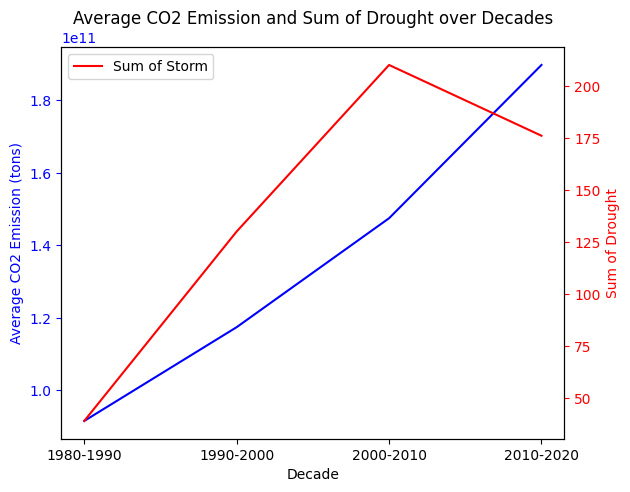

In [231]:
df_results_drought
fig, ax1 = plt.subplots()

ax1.plot(df_results_drought['Decade'], df_results_drought['Average CO2 Emission'], 'b-', label='Average CO2 Emission')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average CO2 Emission (tons)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df_results_drought['Decade'], df_results_drought['Sum of Drought'], 'r-', label='Sum of Storm')
ax2.set_ylabel('Sum of Drought', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Average CO2 Emission and Sum of Drought over Decades')
plt.legend()
plt.show()

In [232]:
#Correlation
import seaborn as sns
df_results_drought

,Decade,Average CO2 Emission,Sum of Drought
0,1980-1990,9.155275e+10,39.0
1,1990-2000,1.174064e+11,130.0
2,2000-2010,1.474483e+11,210.0
3,2010-2020,1.897084e+11,176.0


In [233]:
df_combined = pd.DataFrame({'Decade': df_results_drought['Decade'], 'Average CO2 Emission': df_results_drought['Average CO2 Emission'],
 'Landslide Total':df_results_landslide['Sum of Landslide'], 'Storm Total': df_results_storm['Sum of Storm'],
   'Extreme Temperature Total':df_results_extreme_temp['Sum of Extreme Temperature'],
    'Wildfire Total': df_results_wildfire['Sum of Wildfire'],
     'Flood Total': df_results_flood['Sum of Flood'],
     'Drought Total': df_results_drought['Sum of Drought']})
df_combined

,Decade,Average CO2 Emission,Landslide Total,Storm Total,Extreme Temperature Total,Wildfire Total,Flood Total,Drought Total
0,1980-1990,9.155275e+10,76.0,1274.0,60.0,24.0,569.0,39.0
1,1990-2000,1.174064e+11,190.0,2780.0,682.0,250.0,1260.0,130.0
2,2000-2010,1.474483e+11,310.0,2500.0,320.0,480.0,2040.0,210.0
3,2010-2020,1.897084e+11,308.0,3025.0,264.0,374.0,1914.0,176.0


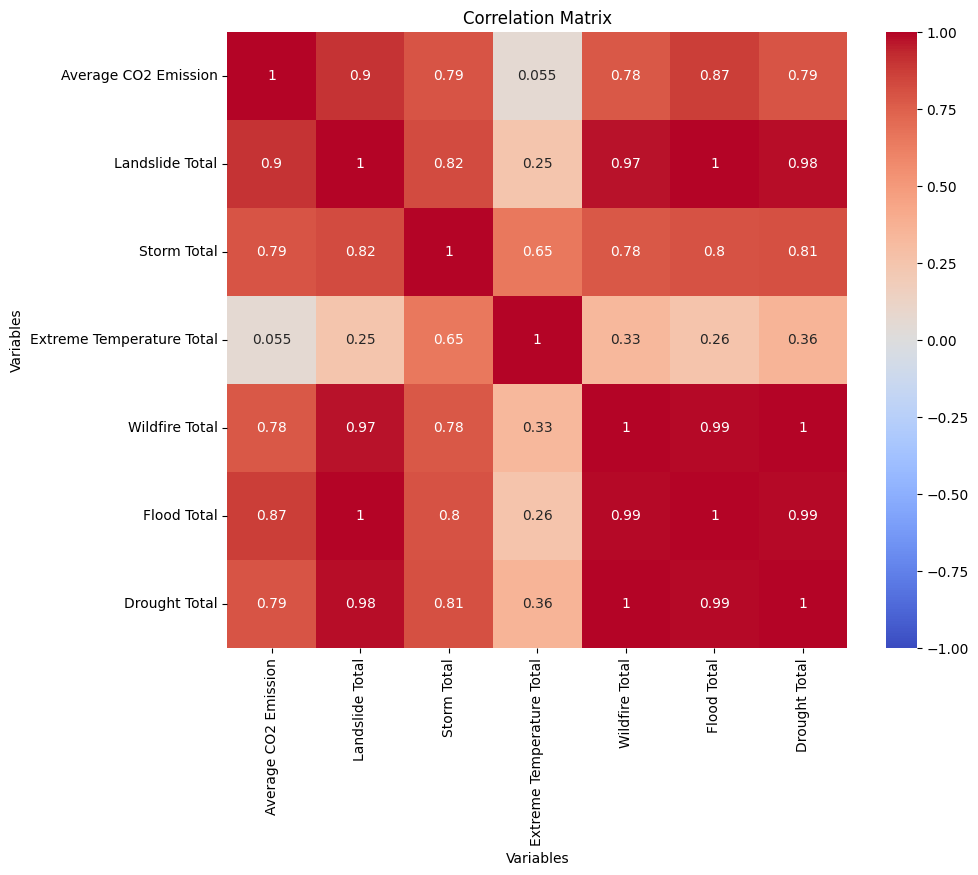

In [234]:
#Finding correlation matrix:
# calculate the correlation matrix
corr_matrix = df_combined[['Average CO2 Emission', 'Landslide Total', 'Storm Total', 'Extreme Temperature Total', 'Wildfire Total', 'Flood Total', 'Drought Total']].corr()

# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [235]:
#Individual correlation
corr_drought = df_combined['Average CO2 Emission'].corr(df_results_drought['Sum of Drought'])
corr_flood = df_combined['Average CO2 Emission'].corr(df_results_flood['Sum of Flood'])
corr_landslide = df_combined['Average CO2 Emission'].corr(df_results_landslide['Sum of Landslide'])
corr_storm = df_combined['Average CO2 Emission'].corr(df_results_storm['Sum of Storm'])
corr_wildfire = df_combined['Average CO2 Emission'].corr(df_results_wildfire['Sum of Wildfire'])
corr_extreme_temp=df_combined['Average CO2 Emission'].corr(df_results_extreme_temp['Sum of Extreme Temperature'])
print("Correlation between CO2 emissions and Sum of Drought:", corr_drought)
print("Correlation between CO2 emissions and Sum of Flood:", corr_flood)
print("Correlation between CO2 emissions and Sum of Landslide:", corr_landslide)
print("Correlation between CO2 emissions and Sum of Storm:", corr_storm)
print("Correlation between CO2 emissions and Sum of Wildfire:", corr_wildfire)
print("Correlation between CO2 emissions and Sum of Extreme Temperature:", corr_extreme_temp)
#interpretation: 
#Strong correlation: |ρ| ≥ 0.7 (e.g., ρ = 0.8 or ρ = -0.8)
# Moderate correlation: 0.4 ≤ |ρ| < 0.7 (e.g., ρ = 0.5 or ρ = -0.5)
# Weak correlation: 0.1 ≤ |ρ| < 0.4 (e.g., ρ = 0.2 or ρ = -0.2)
# Very weak correlation: |ρ| < 0.1 (e.g., ρ = 0.05 or ρ = -0.05)

Correlation between CO2 emissions and Sum of Drought: 0.7902275666979839
Correlation between CO2 emissions and Sum of Flood: 0.8681263478429333
Correlation between CO2 emissions and Sum of Landslide: 0.8990081490024406
Correlation between CO2 emissions and Sum of Storm: 0.7900940288319688
Correlation between CO2 emissions and Sum of Wildfire: 0.7770641650746123
Correlation between CO2 emissions and Sum of Extreme Temperature: 0.05472791067896809
